# Lead Scoring Study Group

An education company named X Education sells online courses to industry professionals.Now, although X Education gets a lot of leads, its lead conversion rate is very poor of about 30%. We need to create an algorithm to identifying hot leads from all prospects so that overall conversion rate increases to 80%. We also have to identify most significant features or criterias impacting leads conversion. 

Submitted by: Dhruva Handa, Mohit Dhawan, Dhwani Hingorani, DSC 64

## Step 1: Reading and Understanding the Data

Let us first import all libraries and read dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data analysis & Vis modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [3]:
# Reading and viewing the Dataset
lead = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Studying the data

In [4]:
lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Clearly there are so many variables that have null values that has to be treated and also we can drop few variables as they are not useful. Lets drop Prospect ID as its not useful.

In [7]:
# Dropping the unrequired columns

lead = lead.drop(columns = ['Prospect ID'], axis =1)
lead.shape

(9240, 36)

## Step 2: Data Cleaning

#### In the excel file we observed that there are many Categorical variables which have same value throughout and some variables have majorily same value throughout, so we can drop such variables. Lets begin with dropping the variables having same value throughout.

In [8]:
# Lets see the Categorical variables
lead_cat = list((lead.select_dtypes(include=['object_'])).columns)
len(lead_cat)

29

In [9]:
for variable in lead_cat:
    print(lead[variable].value_counts())
    print()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

Last Activity
Email Opened                    3437
SMS Sent                        2745
O

In [10]:
# Now lets drop the variables with same values throught..
col_list = ['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content']

lead = lead.drop(columns=col_list)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


#### We had also observed in the data that there are few Categorical variables with Select value therefore replacing them with Null as these are actually Nulls as per problem statement and business understanding.

In [11]:
# Since we have removed 5 Cat variables lets crosscheck the length
lead_cat = list((lead.select_dtypes(include=['object_'])).columns)
len(lead_cat)

24

In [12]:
for variables in lead_cat:
    lead[variables] = np.where(lead[variables] == 'Select', np.NaN , lead[variables])

### Checking for Missing Values

In [13]:
missing_data = pd.DataFrame(round(100*(lead.isnull().sum()/len(lead.index)),2)).reset_index()
missing_data.columns= ['Column_name','Percentage missing']
missing_data

,Column_name,Percentage missing
0,Lead Number,0.00
1,Lead Origin,0.00
2,Lead Source,0.39
3,Do Not Email,0.00
4,Do Not Call,0.00
5,Converted,0.00
6,TotalVisits,1.48
7,Total Time Spent on Website,0.00
8,Page Views Per Visit,1.48
9,Last Activity,1.11


In [14]:
# Removing columns which contain more than 40% of Missing Values
col_miss=lead.columns[round((lead.isnull().sum()/len(lead))*100)>=40]
col_miss

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [15]:
lead = lead.drop(columns=col_miss)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,No,Modified


In [16]:
lead.shape

(9240, 23)

#### Lets now look at Cat variables which have majorly same values... Lets consider the threshold to be 98%

In [17]:
# Since we have removed 5 Cat variables lets crosscheck the length
lead_cat = list((lead.select_dtypes(include=['object_'])).columns)
len(lead_cat)

18

In [18]:
threshold = 0.98
for col in lead_cat :
    temp_df = (lead[col].value_counts(normalize=True)).reset_index()
    temp_df.columns = [col,'Percentage']
    check_df= temp_df[temp_df['Percentage']>=threshold]
    print(check_df)

Empty DataFrame
Columns: [Lead Origin, Percentage]
Index: []
Empty DataFrame
Columns: [Lead Source, Percentage]
Index: []
Empty DataFrame
Columns: [Do Not Email, Percentage]
Index: []
  Do Not Call  Percentage
0          No    0.999784
Empty DataFrame
Columns: [Last Activity, Percentage]
Index: []
Empty DataFrame
Columns: [Country, Percentage]
Index: []
Empty DataFrame
Columns: [Specialization, Percentage]
Index: []
Empty DataFrame
Columns: [What is your current occupation, Percentage]
Index: []
  What matters most to you in choosing a course  Percentage
0                       Better Career Prospects    0.999541
  Search  Percentage
0     No    0.998485
  Newspaper Article  Percentage
0                No    0.999784
  X Education Forums  Percentage
0                 No    0.999892
  Newspaper  Percentage
0        No    0.999892
  Digital Advertisement  Percentage
0                    No    0.999567
  Through Recommendations  Percentage
0                      No    0.999242
Empty DataF

#### Its visible above that what all the variables have threshold > 98%, lets drop them...

In [19]:
lead.drop(columns = ['Do Not Call', 'What matters most to you in choosing a course', 'Search', 
                     'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
                     'Through Recommendations'], inplace = True)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Will revert after reading the email,No,Modified


In [20]:
lead.shape

(9240, 15)

In [21]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 6779 non-null   object 
 10  Specialization                          5860 non-null   obje

### Handling Null Values

#### The numerical variables with NULL Values > 0 are:TotalVisits, Page Views Per Visit

In [22]:
missing_int_col_list = ['TotalVisits', 'Page Views Per Visit']
for col in missing_int_col_list:
    print("{} : mean - {}, mode - {}, median - {}".format(col, lead[col].mean(),
                                                          lead[col].mode()[0], lead[col].median()))

TotalVisits : mean - 3.445237833681204, mode - 0.0, median - 3.0
Page Views Per Visit : mean - 2.3628199494672084, mode - 0.0, median - 2.0


In [23]:
#Imputing MODE for both numeric variables
lead['TotalVisits'] = lead['TotalVisits'].fillna(0.0)
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(0.0)

In [24]:
missing_data = pd.DataFrame(round(100*(lead.isnull().sum()/len(lead.index)),2)).reset_index()
missing_data.columns= ['Column_name','Percentage missing']
missing_data

,Column_name,Percentage missing
0,Lead Number,0.00
1,Lead Origin,0.00
2,Lead Source,0.39
3,Do Not Email,0.00
4,Converted,0.00
5,TotalVisits,0.00
6,Total Time Spent on Website,0.00
7,Page Views Per Visit,0.00
8,Last Activity,1.11
9,Country,26.63


#### Lead Source and Last Activity have very less number of NULL values. We'll replace them with their mode

In [25]:
small_null_col_list = ['Lead Source', 'Last Activity']
for col in small_null_col_list:
    print(" {} : mode - {}".format(col, lead[col].mode()[0]))

 Lead Source : mode - Google
 Last Activity : mode - Email Opened


In [26]:
#Imputing MODE for above variables
lead['Lead Source'] = lead['Lead Source'].fillna('Google')
lead['Last Activity'] = lead['Last Activity'].fillna('Email Opened')

#### Now, in the dataset, It was observed that the Country column has the Max percentage for INDIA and the rest of the countries have very less percentage.. Lets observe this:

In [27]:
temp_df_country = (lead['Country'].value_counts(normalize=True)).reset_index()
temp_df_country.columns = ['Country','Percentage']
temp_df_country.sort_values(by='Percentage')
temp_df_country

,Country,Percentage
0,India,0.957663
1,United States,0.010178
2,United Arab Emirates,0.007818
3,Singapore,0.003540
4,Saudi Arabia,0.003098
5,United Kingdom,0.002213
6,Australia,0.001918
7,Qatar,0.001475
8,Hong Kong,0.001033
9,Bahrain,0.001033


We can see that India is 95%, USA 1% and other countries are very less that even 1%... We decide to make three categories - India, Others and Unknown

In [28]:
lead['Country'] = lead['Country'].fillna('Unknown')

def conv(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Unknown":
        category = "Unknown"
    else:
        category = "Outside India"
    return category

lead['Country'] = lead.apply(lambda x:conv(x['Country']), axis = 1)
lead['Country'].value_counts()

Country
India            6492
Unknown          2461
Outside India     287
Name: count, dtype: int64

In [29]:
# Taking care of Specialisation Column
round(100*(lead['Specialization'].value_counts(normalize = True,dropna = False)),2)

Specialization
NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: proportion, dtype: float64

In [30]:
# Since the count of Nan is higher than all other values we will replace Nan with new category 'Unknown'
lead['Specialization'] = lead['Specialization'].replace(np.NaN,'Unknown')

In [31]:
# Taking care of 'What is your current occupation' Column
round(100*(lead['What is your current occupation'].value_counts(normalize = True,dropna = False)),2)

What is your current occupation
Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: proportion, dtype: float64

In [32]:
# Since the count of Nan is 2nd highest than all other values we will replace Nan with new category 'Unknown'
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.NaN,'Unknown')

In [33]:
# Taking care of 'Tags' Column
round(100*(lead['Tags'].value_counts(normalize = True,dropna = False)),2)

Tags
NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                

In [34]:
# Since the count of Nan is higher than all other values we will replace Nan with new category 'Unknown'
lead['Tags'] = lead['Tags'].replace(np.NaN,'Unknown')

In [35]:
#Checking the NULL Values Again
missing_data = pd.DataFrame(round(100*(lead.isnull().sum()/len(lead.index)),2)).reset_index()
missing_data.columns= ['Column_name','Percentage missing']
missing_data

,Column_name,Percentage missing
0,Lead Number,0.0
1,Lead Origin,0.0
2,Lead Source,0.0
3,Do Not Email,0.0
4,Converted,0.0
5,TotalVisits,0.0
6,Total Time Spent on Website,0.0
7,Page Views Per Visit,0.0
8,Last Activity,0.0
9,Country,0.0


In [36]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Country                                 9240 non-null   object 
 10  Specialization                          9240 non-null   obje

#### Our Data set is ready for Analysis and Modelling

## Step 3: EDA

### Univariate Analysis (Numerical)

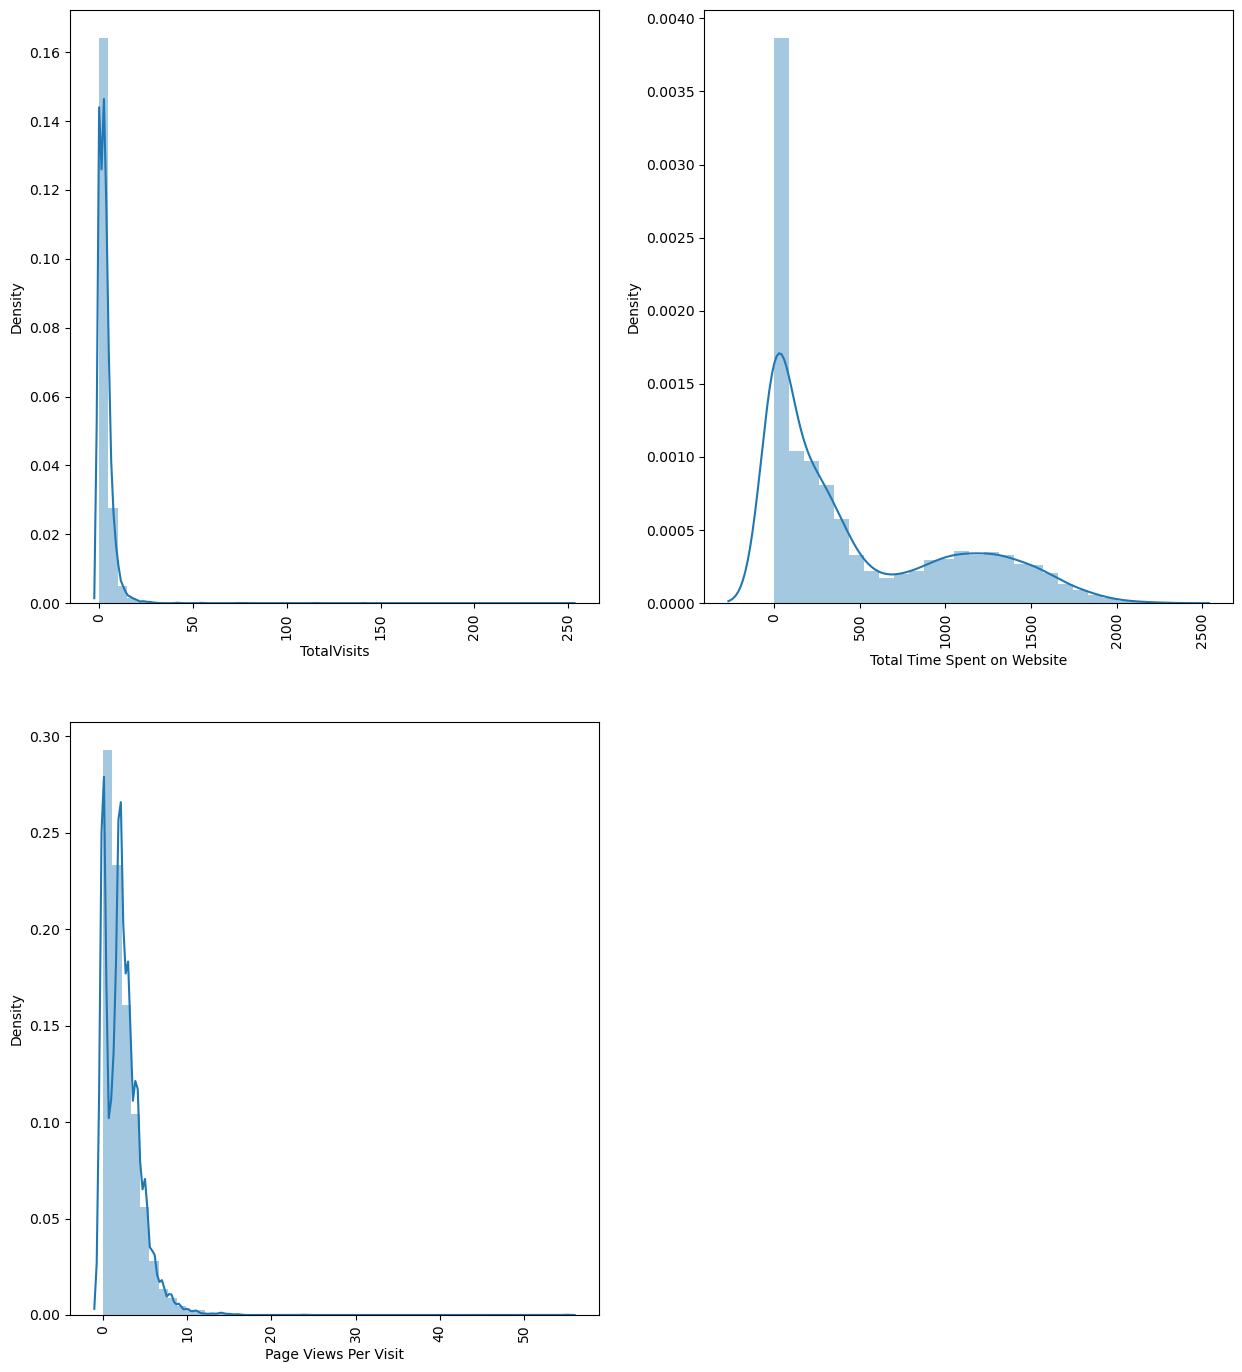

In [37]:
lead_num = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(lead_num):
    
    plt.subplot(2,2, i[0]+1)
    sns.distplot(lead[i[1]])
    
    plt.xticks(rotation=90)
plt.show()

### Univariate Analysis (Categorical)

In [38]:
categorical_vars = lead.select_dtypes(include=['object']).columns
categorical_vars

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

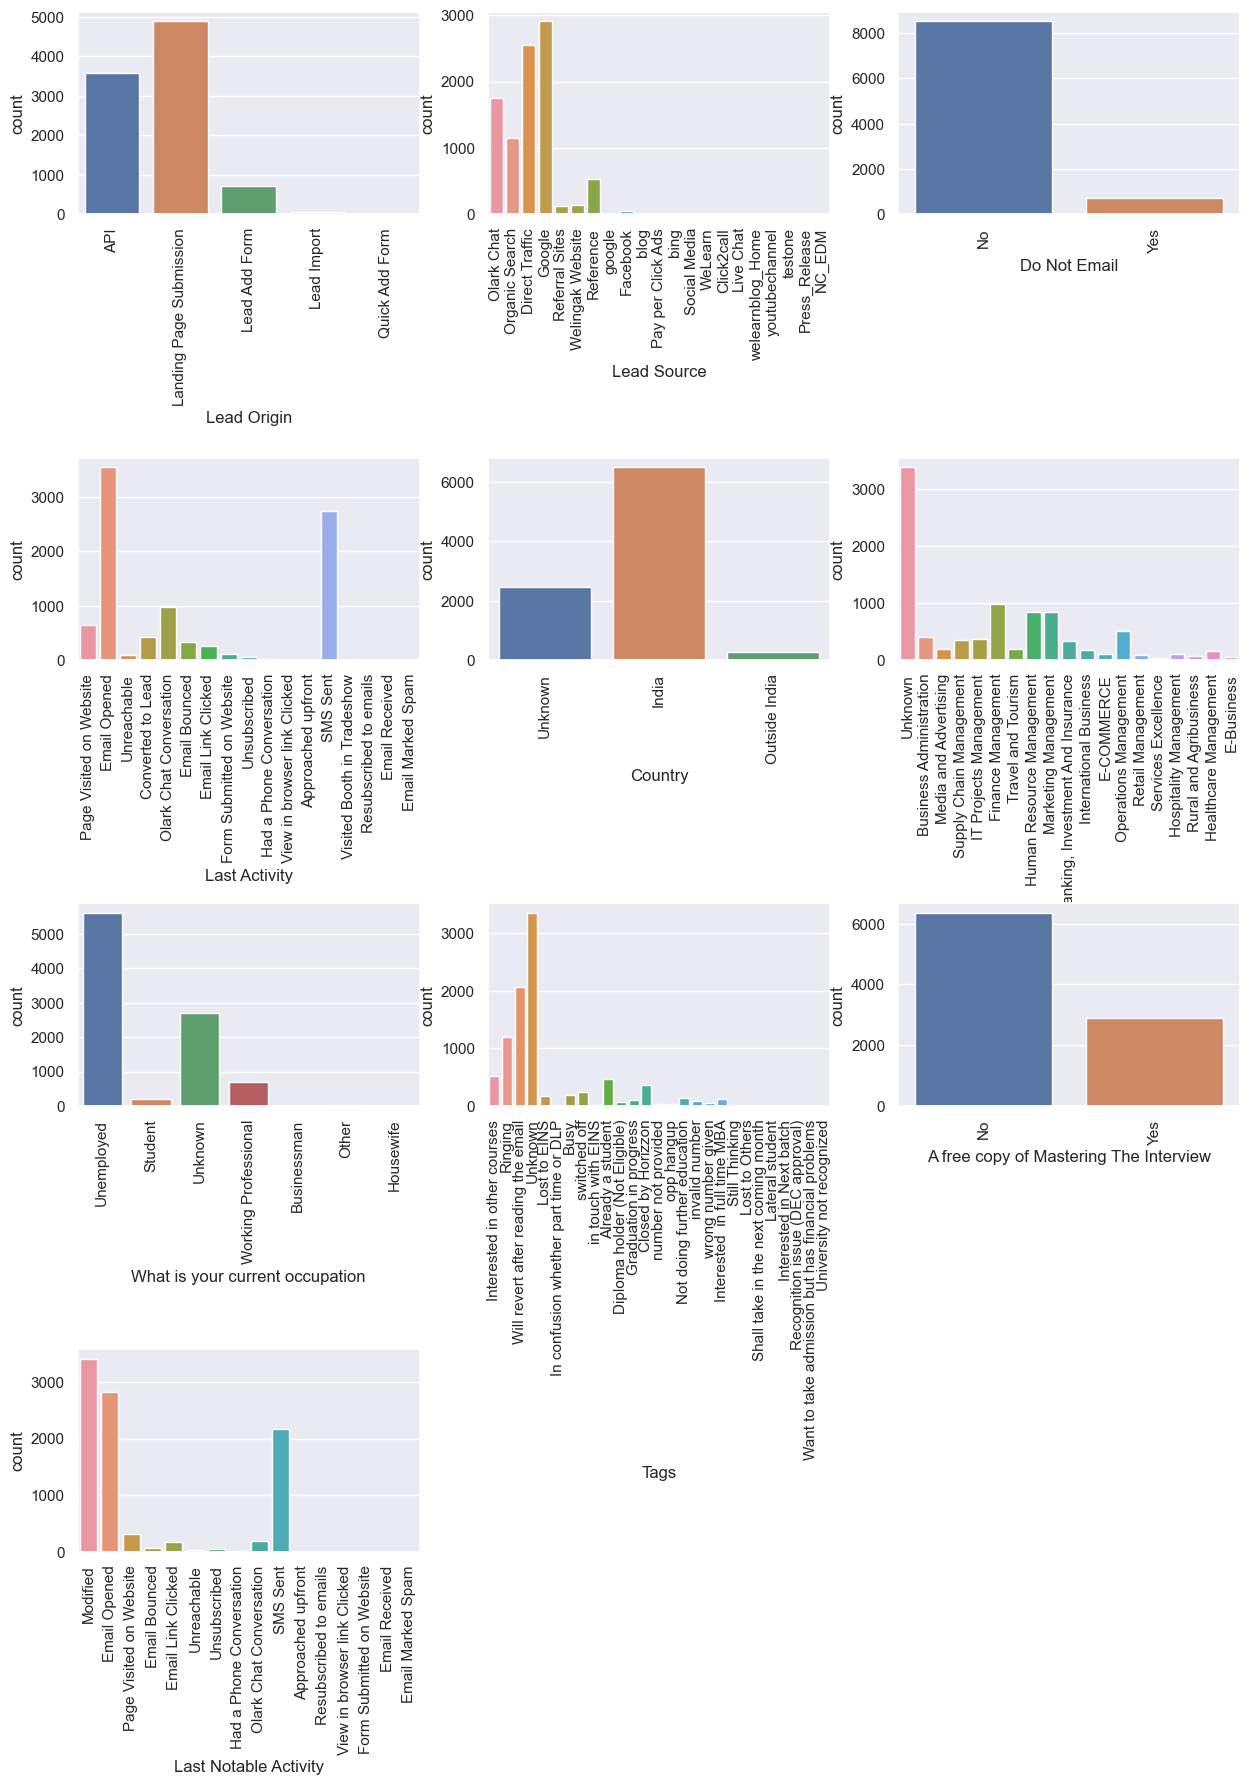

In [39]:
plt.figure(figsize=(15,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(categorical_vars):
    plt.subplot(4,3, i[0]+1)
    sns.countplot(x=i[1],data=lead)
    plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

Bivariate Analysis With respect to Target Column 'Converted'

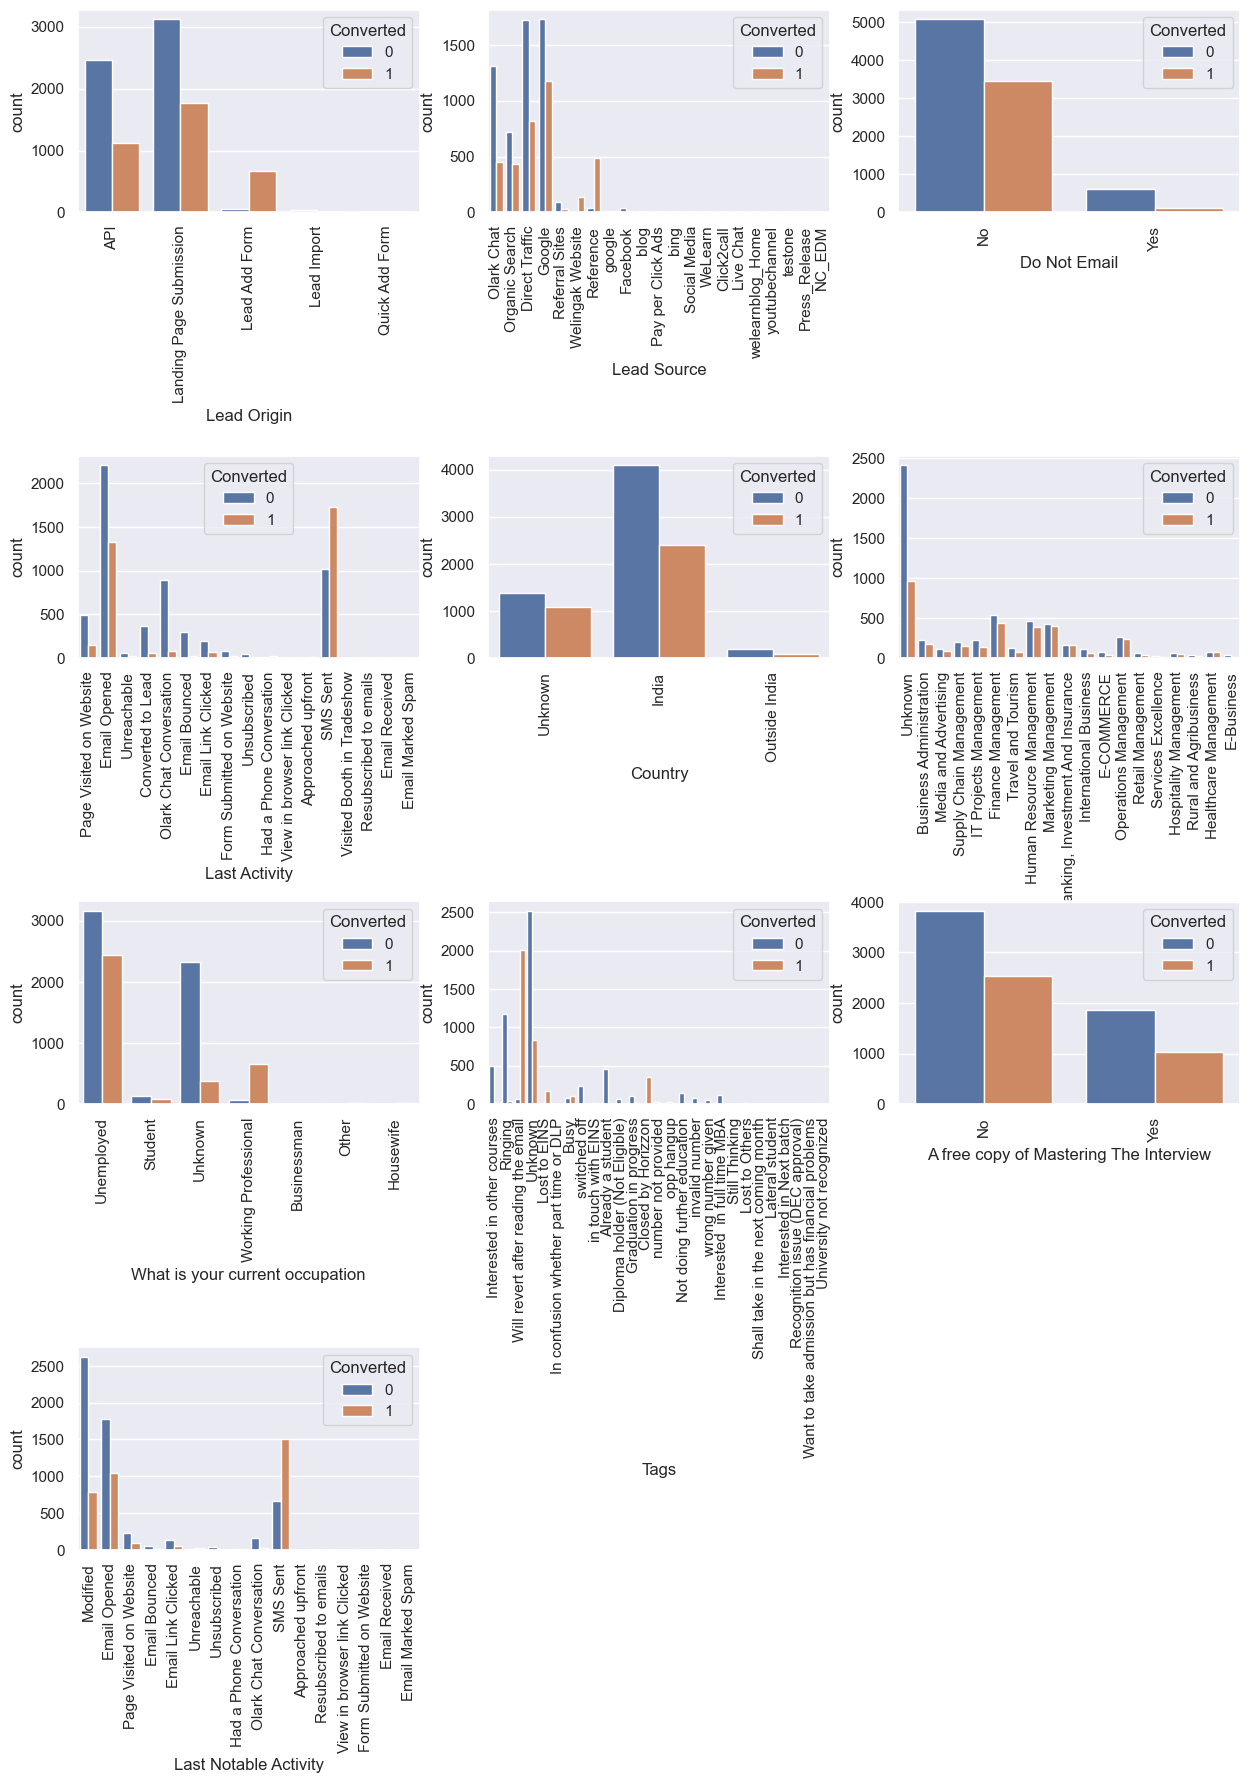

In [40]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(categorical_vars):
    plt.subplot(4,3, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead)
    plt.xticks(rotation=90)
plt.show()

## Step 4: Data Preparation

In [41]:
#Lets Now Convert Some Binary Variable ( Yes/ No ) to 1/0

binary_varlist = ['Do Not Email', 'A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

lead[binary_varlist]=lead[binary_varlist].apply(binary_map)

lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unemployed,Interested in other courses,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,Ringing,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,Will revert after reading the email,0,Modified


In [42]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   int64  
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Country                                 9240 non-null   object 
 10  Specialization                          9240 non-null   obje

#### Now lets work on the Categorical columns which have more than 2 categories...Lets create Dummy variables for them.

In [43]:
lead_cat = list((lead.select_dtypes(include=['object_'])).columns)
multiple_varlist=[col for col in lead_cat if col not in binary_varlist]
print("multiple_label_vars:",len(multiple_varlist),'binary_label_vars:',len(binary_varlist))

multiple_label_vars: 8 binary_label_vars: 2


In [44]:
# Therefore we have to create Dummy Variables for 8 variables

dummy_vars = pd.get_dummies(lead[multiple_varlist], drop_first=True, dtype = int)
dummy_vars

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Outside India,Country_Unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,

In [45]:
# Now lets concatenate 2 Dataframes and Drop the repeated columns from which the dummy vars have been formed

lead=pd.concat([lead,dummy_vars], axis =1)
lead.drop(columns=multiple_varlist, inplace = True)
lead.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Outside India,Country_Unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,1,0

## Step 5: Model Building

### Train - Test Split

In [46]:
X=lead.drop(['Lead Number','Converted'], axis =1 )
#ignoring LeadNumber as it is just a internal count record identifying each lead and Converted (making it Dependant variable)

X.shape

(9240, 112)

In [47]:
y=lead['Converted']
y.shape

(9240,)

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
# Feature Scaling
scaler = StandardScaler()
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Outside India,Country_Unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.109111,0.005716,-0.452487,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.297808,-0.691418,0.083827,0,

In [50]:
### Checking the Conversion Rate
conversion_rate = (sum(lead['Converted'])/len(lead['Converted'].index))*100
print("Current conversion rate is : {}".format(round(conversion_rate,2)))

Current conversion rate is : 38.54


### Feature Selection Using RFE

In [51]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 5),
 ('TotalVisits', False, 51),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 88),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', False, 17),
 ('Lead Origin_Lead Import', False, 29),
 ('Lead Origin_Quick Add Form', False, 59),
 ('Lead Source_Direct Traffic', False, 58),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 65),
 ('Lead Source_Live Chat', False, 85),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', False, 66),
 ('Lead Source_Organic Search', False, 64),
 ('Lead Source_Pay per Click Ads', False, 90),
 ('Lead Source_Press_Release', False, 80),
 ('Lead Source_Reference', False, 39),
 ('Lead Source_Referral Sites', False, 63),
 ('Lead Source_Social Media', False, 55),
 ('Lead Source_WeLearn', False, 83),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 76),
 ('Lead Source_bl

In [53]:
rfe_selected_col = X_train.columns[rfe.support_ == True]
rfe_selected_col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in Next batch', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Using Statsmodel for Statistics 

In [54]:
X_train_1st = sm.add_constant(X_train[rfe_selected_col])
X_test_1st = sm.add_constant(X_test[rfe_selected_col])
logm1 = sm.GLM(y_train,X_train_1st, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1266.2
Date:                Tue, 23 Jul 2024   Deviance:                       2532.4
Time:                        21:56:09   Pearson chi2:                 1.56e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6085
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.1511      0.205    -15.389      0.000      -3.552      -2.750
Lead Source_Welingak Website                       2.7938      0.753      3.710      0.000       1.318       4.270
Last Activity_SMS Sent                             2.2049      0.122     18.045      0.000       1.965       2.444
What is your current occupation_Unknown           -2.5516      0.145    -17.553      0.000      -2.836      -2.267
Tags_Busy                                          2.1856      0.293      7.451      0.000       1.611       2.761
Tags_Closed by Horizzon                            9.6763      1.025      9.438      0.000       7.667      11.686
Tags_Diploma holder (Not Eligible)               -20.9193   1.84e+04     -0.001      0.999   -3.61e+04    3.61e+04
Tags_Interested in Next batch                     25.5123   5.86e+04      0.000      1.000   -1.15e+05    1.15e+05
Tags_Lateral student                              26.7092   7.38e+04      0.000      1.000   -1.45e+05    1.45e+05
Tags_Lost to EINS                                  9.6548      0.771     12.527      0.000       8.144      11.165
Tags_Ringing                                      -1.5779      0.297     -5.306      0.000      -2.161      -0.995
Tags_Unknown                                       3.6209      0.231     15.686      0.000       3.168       4.073
Tags_Will revert after reading the email           6.4956      0.255     25.498      0.000       5.996       6.995
Tags_in touch with EINS                            2.2582      0.784      2.880      0.004       0.721       3.795
Tags_invalid number                               -2.1179      1.042     -2.032      0.042      -4.160      -0.075
Tags_number not provided                         -22.2687   2.53e+04     -0.001      0.999   -4.96e+04    4.95e+04
Tags_switched off                                 -2.0469      0.555     -3.688      0.000      -3.135      -0.959
Tags_wrong number given                          -22.4278   2.15e+04     -0.001      0.999   -4.21e+04     4.2e+04
Last Notable Activity_Had a Phone Conversation     2.6639      1.437      1.854      0.064      -0.152       5.480
Last Notable Activity_Modified                    -1.5519      0.122    -12.709      0.000      -1.791      -1.313
Last Notable Activity_Olark Chat Conversation     -1.1520      0.418     -2.757      0.006      -1.971      -0.333
==================================================================================================================
"""

In [55]:
# Lets get the predicted values on the train set
y_train_pred_1st = res.predict(X_train_1st)
y_train_pred_1st[:10]

1871    0.008758
6795    0.615321
3516    0.008758
8105    0.074187
3934    0.253095
4844    0.996125
3297    0.008758
8071    0.993127
987     0.025737
7423    0.996125
dtype: float64

In [56]:
### Lets create the dataframe with actual y ( conversion ) and the predicted y (conversion) 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred_1st})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number
1871,0,0.008758,1871
6795,0,0.615321,6795
3516,0,0.008758,3516
8105,0,0.074187,8105
3934,0,0.253095,3934


### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0 (this is just to refine the model at the end we will use ROC curve and sensitivity-specificity to get this threshold...

In [57]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number,predicted
1871,0,0.008758,1871,0
6795,0,0.615321,6795,1
3516,0,0.008758,3516,0
8105,0,0.074187,8105,0
3934,0,0.253095,3934,0


Since the logistic curve gives you just the probabilities and not the actual classification of 'COnversion' and 'Non-Converted', we need to find a threshold probability to classify leads as 'converted' and 'non-converted'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular lead to convert is less than 0.5, we'd classify it as 'Non-converted' and if it's greater than 0.5, we'd classify it as 'converted'. The choice of 0.5 is completely arbitrary at this stage.

In [58]:
#Lets discuss the Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3779  223]
 [ 224 2242]]


In [59]:
# Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9308905380333952


#### Checking VIF and second Model

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_selected_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_selected_col].values, i) for i in range(X_train[rfe_selected_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Unknown,4.97
2,What is your current occupation_Unknown,4.65
1,Last Activity_SMS Sent,1.67
18,Last Notable Activity_Modified,1.45
11,Tags_Will revert after reading the email,1.37
9,Tags_Ringing,1.12
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
8,Tags_Lost to EINS,1.06
15,Tags_switched off,1.04


VIF is <5 criteria, therefore we will check for the P-values in the model statistics..

After checking the Stats we see that the P-values of 3 variables viz.,Tags_Diploma holder (Not Eligible), Tags_Interested in Next batch, Tags_Lateral student, Tags_number not provided, Tags_wrong number given have high P-values of .999. Intutively also these don't seem to be important to our model. Lets remove one of them and run the MODEL


In [61]:
rfe_selected_col = rfe_selected_col.drop('Tags_Diploma holder (Not Eligible)', 1)
len(rfe_selected_col)

19

In [62]:
# Let's re-run the model using the selected variables......
X_train_2nd = sm.add_constant(X_train[rfe_selected_col])
X_test_2nd = sm.add_constant(X_test[rfe_selected_col])
logm2 = sm.GLM(y_train,X_train_2nd, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1267.5
Date:                Tue, 23 Jul 2024   Deviance:                       2534.9
Time:                        21:56:09   Pearson chi2:                 1.56e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6084
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.2007      0.204    -15.681      0.000      -3.601      -2.801
Lead Source_Welingak Website                       2.7937      0.753      3.710      0.000       1.318       4.270
Last Activity_SMS Sent                             2.2077      0.122     18.058      0.000       1.968       2.447
What is your current occupation_Unknown           -2.5524      0.145    -17.553      0.000      -2.837      -2.267
Tags_Busy                                          2.2333      0.293      7.620      0.000       1.659       2.808
Tags_Closed by Horizzon                            9.7253      1.025      9.487      0.000       7.716      11.734
Tags_Interested in Next batch                     25.5590   5.86e+04      0.000      1.000   -1.15e+05    1.15e+05
Tags_Lateral student                              26.7555   7.38e+04      0.000      1.000   -1.45e+05    1.45e+05
Tags_Lost to EINS                                  9.7045      0.771     12.594      0.000       8.194      11.215
Tags_Ringing                                      -1.5307      0.297     -5.151      0.000      -2.113      -0.948
Tags_Unknown                                       3.6698      0.230     15.930      0.000       3.218       4.121
Tags_Will revert after reading the email           6.5446      0.254     25.731      0.000       6.046       7.043
Tags_in touch with EINS                            2.3069      0.784      2.942      0.003       0.770       3.844
Tags_invalid number                               -2.0707      1.042     -1.987      0.047      -4.113      -0.028
Tags_number not provided                         -22.2214   2.53e+04     -0.001      0.999   -4.95e+04    4.95e+04
Tags_switched off                                 -1.9999      0.555     -3.604      0.000      -3.087      -0.912
Tags_wrong number given                          -22.3806   2.15e+04     -0.001      0.999   -4.21e+04     4.2e+04
Last Notable Activity_Had a Phone Conversation     2.6885      1.442      1.865      0.062      -0.137       5.514
Last Notable Activity_Modified                    -1.5514      0.122    -12.704      0.000      -1.791      -1.312
Last Notable Activity_Olark Chat Conversation     -1.1509      0.418     -2.754      0.006      -1.970      -0.332
==================================================================================================================
"""

In [63]:
y_train_pred_2nd = res.predict(X_train_2nd)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred_2nd})
y_train_pred_final['Lead Number'] = lead['Lead Number']
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)



# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print()
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3779  223]
 [ 224 2242]]

0.9308905380333952


#### Lets Check the VIF again and run the subsequent Models

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_selected_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_selected_col].values, i) for i in range(X_train[rfe_selected_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Unknown,4.97
2,What is your current occupation_Unknown,4.65
1,Last Activity_SMS Sent,1.67
17,Last Notable Activity_Modified,1.44
10,Tags_Will revert after reading the email,1.37
8,Tags_Ringing,1.12
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
7,Tags_Lost to EINS,1.06
14,Tags_switched off,1.04


In [65]:
rfe_selected_col = rfe_selected_col.drop('Tags_Interested in Next batch', 1)
len(rfe_selected_col)

18

In [66]:
X_train_3rd = sm.add_constant(X_train[rfe_selected_col])
X_test_3rd = sm.add_constant(X_test[rfe_selected_col])
logm3 = sm.GLM(y_train,X_train_3rd, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1273.7
Date:                Tue, 23 Jul 2024   Deviance:                       2547.4
Time:                        21:56:10   Pearson chi2:                 1.62e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6076
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.0758      0.191    -16.097      0.000      -3.450      -2.701
Lead Source_Welingak Website                       2.7995      0.754      3.713      0.000       1.322       4.277
Last Activity_SMS Sent                             2.2470      0.122     18.414      0.000       2.008       2.486
What is your current occupation_Unknown           -2.5646      0.146    -17.554      0.000      -2.851      -2.278
Tags_Busy                                          2.0877      0.284      7.344      0.000       1.530       2.645
Tags_Closed by Horizzon                            9.6168      1.023      9.402      0.000       7.612      11.621
Tags_Lateral student                              26.6083   7.37e+04      0.000      1.000   -1.44e+05    1.45e+05
Tags_Lost to EINS                                  9.6048      0.768     12.507      0.000       8.100      11.110
Tags_Ringing                                      -1.6881      0.288     -5.870      0.000      -2.252      -1.124
Tags_Unknown                                       3.5444      0.219     16.172      0.000       3.115       3.974
Tags_Will revert after reading the email           6.4264      0.244     26.286      0.000       5.947       6.906
Tags_in touch with EINS                            2.1789      0.783      2.783      0.005       0.644       3.713
Tags_invalid number                               -2.2286      1.040     -2.144      0.032      -4.266      -0.191
Tags_number not provided                         -22.3737   2.52e+04     -0.001      0.999   -4.94e+04    4.94e+04
Tags_switched off                                 -2.1595      0.550     -3.928      0.000      -3.237      -1.082
Tags_wrong number given                          -22.5332   2.14e+04     -0.001      0.999    -4.2e+04    4.19e+04
Last Notable Activity_Had a Phone Conversation     2.6338      1.428      1.845      0.065      -0.165       5.432
Last Notable Activity_Modified                    -1.5712      0.122    -12.887      0.000      -1.810      -1.332
Last Notable Activity_Olark Chat Conversation     -1.1521      0.418     -2.757      0.006      -1.971      -0.333
==================================================================================================================
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_selected_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_selected_col].values, i) for i in range(X_train[rfe_selected_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Unknown,4.97
2,What is your current occupation_Unknown,4.65
1,Last Activity_SMS Sent,1.66
16,Last Notable Activity_Modified,1.44
9,Tags_Will revert after reading the email,1.37
7,Tags_Ringing,1.12
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
6,Tags_Lost to EINS,1.06
13,Tags_switched off,1.04


In [68]:
#Removing Tags_Lateral student
rfe_selected_col = rfe_selected_col.drop('Tags_Lateral student', 1)
len(rfe_selected_col)

17

In [69]:
X_train_4th = sm.add_constant(X_train[rfe_selected_col])
X_test_4th = sm.add_constant(X_test[rfe_selected_col])
logm4 = sm.GLM(y_train,X_train_4th, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1279.7
Date:                Tue, 23 Jul 2024   Deviance:                       2559.5
Time:                        21:56:10   Pearson chi2:                 1.63e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6069
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.0053      0.185    -16.284      0.000      -3.367      -2.644
Lead Source_Welingak Website                       2.7958      0.754      3.708      0.000       1.318       4.273
Last Activity_SMS Sent                             2.2717      0.122     18.642      0.000       2.033       2.511
What is your current occupation_Unknown           -2.5724      0.146    -17.577      0.000      -2.859      -2.286
Tags_Busy                                          1.9999      0.280      7.140      0.000       1.451       2.549
Tags_Closed by Horizzon                            9.5347      1.022      9.334      0.000       7.533      11.537
Tags_Lost to EINS                                  9.5296      0.766     12.436      0.000       8.028      11.032
Tags_Ringing                                      -1.7799      0.283     -6.286      0.000      -2.335      -1.225
Tags_Unknown                                       3.4665      0.213     16.243      0.000       3.048       3.885
Tags_Will revert after reading the email           6.3470      0.239     26.536      0.000       5.878       6.816
Tags_in touch with EINS                            2.0984      0.782      2.683      0.007       0.565       3.632
Tags_invalid number                               -2.3207      1.038     -2.235      0.025      -4.356      -0.285
Tags_number not provided                         -22.4635   2.52e+04     -0.001      0.999   -4.93e+04    4.93e+04
Tags_switched off                                 -2.2526      0.547     -4.114      0.000      -3.326      -1.179
Tags_wrong number given                          -22.6244   2.14e+04     -0.001      0.999   -4.19e+04    4.19e+04
Last Notable Activity_Had a Phone Conversation     2.6074      1.420      1.836      0.066      -0.176       5.390
Last Notable Activity_Modified                    -1.5581      0.121    -12.845      0.000      -1.796      -1.320
Last Notable Activity_Olark Chat Conversation     -1.1454      0.418     -2.742      0.006      -1.964      -0.327
==================================================================================================================
"""

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_selected_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_selected_col].values, i) for i in range(X_train[rfe_selected_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Unknown,4.96
2,What is your current occupation_Unknown,4.65
1,Last Activity_SMS Sent,1.66
15,Last Notable Activity_Modified,1.44
8,Tags_Will revert after reading the email,1.37
6,Tags_Ringing,1.12
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.06
12,Tags_switched off,1.04


In [71]:
#Removing Tags_number not provided
rfe_selected_col = rfe_selected_col.drop('Tags_number not provided', 1)
len(rfe_selected_col)

16

In [72]:
X_train_5th = sm.add_constant(X_train[rfe_selected_col])
X_test_5th = sm.add_constant(X_test[rfe_selected_col])
logm5 = sm.GLM(y_train,X_train_5th, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.4
Date:                Tue, 23 Jul 2024   Deviance:                       2564.8
Time:                        21:56:11   Pearson chi2:                 1.61e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6066
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.0750      0.185    -16.607      0.000      -3.438      -2.712
Lead Source_Welingak Website                       2.7927      0.753      3.706      0.000       1.316       4.270
Last Activity_SMS Sent                             2.2538      0.121     18.597      0.000       2.016       2.491
What is your current occupation_Unknown           -2.5667      0.146    -17.585      0.000      -2.853      -2.281
Tags_Busy                                          2.0788      0.279      7.443      0.000       1.531       2.626
Tags_Closed by Horizzon                            9.5955      1.022      9.391      0.000       7.593      11.598
Tags_Lost to EINS                                  9.5863      0.767     12.505      0.000       8.084      11.089
Tags_Ringing                                      -1.6954      0.282     -6.011      0.000      -2.248      -1.143
Tags_Unknown                                       3.5358      0.214     16.536      0.000       3.117       3.955
Tags_Will revert after reading the email           6.4127      0.240     26.731      0.000       5.943       6.883
Tags_in touch with EINS                            2.1691      0.781      2.776      0.006       0.638       3.700
Tags_invalid number                               -2.2360      1.038     -2.154      0.031      -4.271      -0.201
Tags_switched off                                 -2.1670      0.547     -3.963      0.000      -3.239      -1.095
Tags_wrong number given                          -21.5419    1.3e+04     -0.002      0.999   -2.55e+04    2.54e+04
Last Notable Activity_Had a Phone Conversation     2.6387      1.427      1.850      0.064      -0.157       5.435
Last Notable Activity_Modified                    -1.5475      0.121    -12.769      0.000      -1.785      -1.310
Last Notable Activity_Olark Chat Conversation     -1.1432      0.418     -2.736      0.006      -1.962      -0.324
==================================================================================================================
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_selected_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_selected_col].values, i) for i in range(X_train[rfe_selected_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Unknown,4.96
2,What is your current occupation_Unknown,4.65
1,Last Activity_SMS Sent,1.65
14,Last Notable Activity_Modified,1.44
8,Tags_Will revert after reading the email,1.37
0,Lead Source_Welingak Website,1.12
6,Tags_Ringing,1.12
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.06
3,Tags_Busy,1.04


In [74]:
#Removing Tags_wrong number given
rfe_selected_col = rfe_selected_col.drop('Tags_wrong number given', 1)
len(rfe_selected_col)

15

In [75]:
X_train_6th = sm.add_constant(X_train[rfe_selected_col])
X_test_6th = sm.add_constant(X_test[rfe_selected_col])
logm6 = sm.GLM(y_train,X_train_6th, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1286.4
Date:                Tue, 23 Jul 2024   Deviance:                       2572.8
Time:                        21:56:11   Pearson chi2:                 1.58e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6061
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.1800      0.186    -17.096      0.000      -3.545      -2.815
Lead Source_Welingak Website                       2.7895      0.753      3.705      0.000       1.314       4.265
Last Activity_SMS Sent                             2.2282      0.120     18.517      0.000       1.992       2.464
What is your current occupation_Unknown           -2.5587      0.145    -17.592      0.000      -2.844      -2.274
Tags_Busy                                          2.1976      0.278      7.903      0.000       1.653       2.743
Tags_Closed by Horizzon                            9.6911      1.022      9.482      0.000       7.688      11.694
Tags_Lost to EINS                                  9.6760      0.767     12.616      0.000       8.173      11.179
Tags_Ringing                                      -1.5691      0.280     -5.596      0.000      -2.119      -1.020
Tags_Unknown                                       3.6415      0.214     16.991      0.000       3.221       4.062
Tags_Will revert after reading the email           6.5141      0.241     27.057      0.000       6.042       6.986
Tags_in touch with EINS                            2.2766      0.780      2.919      0.004       0.748       3.805
Tags_invalid number                               -2.1094      1.038     -2.033      0.042      -4.143      -0.076
Tags_switched off                                 -2.0393      0.546     -3.736      0.000      -3.109      -0.969
Last Notable Activity_Had a Phone Conversation     2.6856      1.438      1.868      0.062      -0.132       5.504
Last Notable Activity_Modified                    -1.5360      0.121    -12.689      0.000      -1.773      -1.299
Last Notable Activity_Olark Chat Conversation     -1.1415      0.418     -2.732      0.006      -1.961      -0.322
==================================================================================================================
"""

In [76]:
y_train_pred_6th = res.predict(X_train_6th)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred_6th})
y_train_pred_final['Lead Number'] = lead['Lead Number']
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)



# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print()
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3779  223]
 [ 232 2234]]

0.9296536796536796


Accuracy is still good

In [77]:
#Removing Last Notable Activity_Had a Phone Conversation
rfe_selected_col = rfe_selected_col.drop('Last Notable Activity_Had a Phone Conversation', 1)
len(rfe_selected_col)

14

In [78]:
X_train_7th = sm.add_constant(X_train[rfe_selected_col])
X_test_7th = sm.add_constant(X_test[rfe_selected_col])
logm7 = sm.GLM(y_train,X_train_7th, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1288.0
Date:                Tue, 23 Jul 2024   Deviance:                       2576.1
Time:                        21:56:11   Pearson chi2:                 1.58e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6059
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.1658      0.185    -17.078      0.000      -3.529      -2.802
Lead Source_Welingak Website                      2.7908      0.753      3.706      0.000       1.315       4.267
Last Activity_SMS Sent                            2.2228      0.120     18.495      0.000       1.987       2.458
What is your current occupation_Unknown          -2.5539      0.145    -17.571      0.000      -2.839      -2.269
Tags_Busy                                         2.1876      0.278      7.878      0.000       1.643       2.732
Tags_Closed by Horizzon                           9.6816      1.022      9.473      0.000       7.678      11.685
Tags_Lost to EINS                                 9.6622      0.767     12.602      0.000       8.159      11.165
Tags_Ringing                                     -1.5786      0.280     -5.637      0.000      -2.128      -1.030
Tags_Unknown                                      3.6298      0.214     16.975      0.000       3.211       4.049
Tags_Will revert after reading the email          6.5101      0.240     27.093      0.000       6.039       6.981
Tags_in touch with EINS                           2.2653      0.780      2.905      0.004       0.737       3.794
Tags_invalid number                              -2.1188      1.037     -2.042      0.041      -4.152      -0.086
Tags_switched off                                -2.0486      0.546     -3.754      0.000      -3.118      -0.979
Last Notable Activity_Modified                   -1.5414      0.121    -12.740      0.000      -1.778      -1.304
Last Notable Activity_Olark Chat Conversation    -1.1475      0.418     -2.746      0.006      -1.966      -0.329
=================================================================================================================
"""

All p-values are now low

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_selected_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_selected_col].values, i) for i in range(X_train[rfe_selected_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Unknown,4.96
2,What is your current occupation_Unknown,4.65
1,Last Activity_SMS Sent,1.64
12,Last Notable Activity_Modified,1.43
8,Tags_Will revert after reading the email,1.36
0,Lead Source_Welingak Website,1.12
6,Tags_Ringing,1.12
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.06
3,Tags_Busy,1.04


VIF is below 5

In [80]:
y_train_pred_7th = res.predict(X_train_7th)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred_7th})
y_train_pred_final['Lead Number'] = lead['Lead Number']
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)



# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)
print()
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3780  222]
 [ 232 2234]]

0.9298082869511441


Accuracy is still GOOD!

## Step 6: Model Validation

In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity: ",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity: ",TN / float(TN+FP))
# positive predictive value 
print ("TPR: ", TP / float(TP+FP))
# Negative predictive value
print ("TNR: ", TN / float(TN+ FN))

Sensitivity:  0.9059205190592052
Specificity:  0.9445277361319341
TPR:  0.9096091205211726
TNR:  0.942173479561316


Sensitivity is 90%. Sensitivity is TP/TP+FN i.e Hot leads / Hot leads + Those leads which had high chances of conversion but we didnot tag them as Hot leads.. Therefore, for Max Conversion, Sensitivity should be good and in our Case it is 90% which is Good number.

### Optimal Cut-off

In [83]:
# Let's create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.008625,641410,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.613956,597687,1,1,1,1,1,1,1,1,0,0,0
3516,0,0.008625,626825,0,1,0,0,0,0,0,0,0,0,0
8105,0,0.074358,587928,0,1,0,0,0,0,0,0,0,0,0
3934,0,0.254002,622366,0,1,1,1,0,0,0,0,0,0,0


In [84]:
# let's find accuracy, sensitivity and specificity for various probability cutoffs.
cutoff = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.814162     0.969181     0.718641
0.2          0.2  0.919759     0.934307     0.910795
0.3          0.3  0.931045     0.912409     0.942529
0.4          0.4  0.930891     0.909976     0.943778
0.5          0.5  0.929808     0.905921     0.944528
0.6          0.6  0.921459     0.856042     0.961769
0.7          0.7  0.914193     0.811030     0.977761
0.8          0.8  0.912801     0.794404     0.985757
0.9          0.9  0.893166     0.733171     0.991754


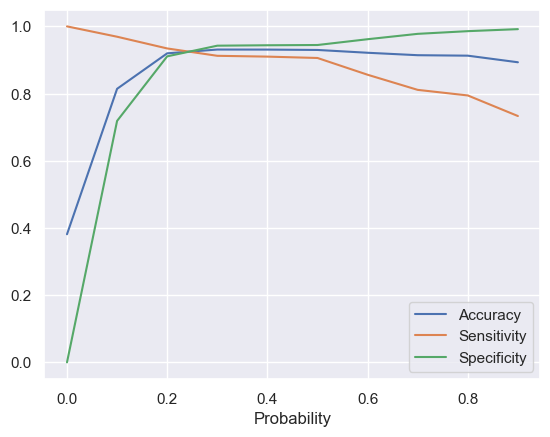

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

Taking 0.25 as the Cutoff Probability

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.008625,641410,0,1,0,0,0,0,0,0,0,0,0,0
6795,0,0.613956,597687,1,1,1,1,1,1,1,1,0,0,0,1
3516,0,0.008625,626825,0,1,0,0,0,0,0,0,0,0,0,0
8105,0,0.074358,587928,0,1,0,0,0,0,0,0,0,0,0,0
3934,0,0.254002,622366,0,1,1,1,0,0,0,0,0,0,0,1


In [87]:
#Lets now check the Overall Accuracy!

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9197588126159555

In [88]:
confusion_2nd = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_2nd

array([[3645,  357],
       [ 162, 2304]], dtype=int64)

In [89]:
TP = confusion_2nd[1,1] # true positive 
TN = confusion_2nd[0,0] # true negatives
FP = confusion_2nd[0,1] # false positives
FN = confusion_2nd[1,0] # false negatives

In [90]:
#Sensitivity

TP / float(TP+FN)

0.9343065693430657

Which means with the Optimal Cutoff Probability Sensitivity has increased to approx 93%

#### Precision-Recall tradeoff

In [91]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

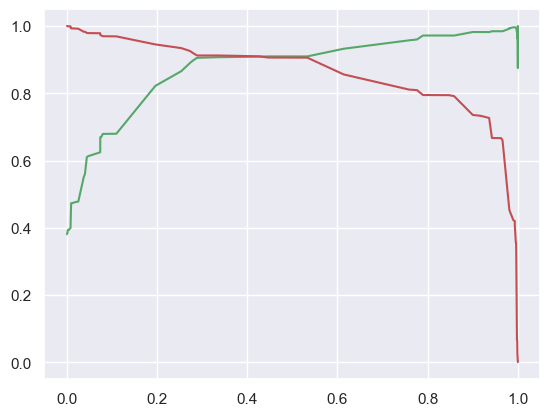

In [92]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 7: Model Testing on Test Set

In [93]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [94]:
X_test_final = X_test[rfe_selected_col]

In [95]:
X_test_final_sm = sm.add_constant(X_test_final)

In [96]:
y_test_pred = res.predict(X_test_final_sm)

In [97]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [98]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([pd.DataFrame(y_test), y_pred_1],axis=1)

In [99]:
y_pred_final.columns = ['Converted', 'Test_conversion_predicted']
y_pred_final.head()

,Converted,Test_conversion_predicted
4269,1,0.533188
2376,1,0.996193
7766,1,0.965920
9199,0,0.008950
4359,1,0.965920


### Using same cut-off


In [100]:
y_pred_final['final_predicted'] = y_pred_final.Test_conversion_predicted.map(lambda x: 1 if x > 0.25 else 0)

In [101]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9217171717171717

In [102]:
confusion_3rd = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_3rd

array([[1516,  161],
       [  56, 1039]], dtype=int64)

In [103]:
TP = confusion_3rd[1,1] # true positive 
TN = confusion_3rd[0,0] # true negatives
FP = confusion_3rd[0,1] # false positives
FN = confusion_3rd[1,0] # false negatives

In [104]:
#Sensitivity
TP / float(TP+FN)

0.9488584474885845

This looks like a good model. In the train data we were able to  identify the hot-leads by 93% and for test-data by 94%.